In [10]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

plt.rcParams['figure.figsize'] = 16, 16

In [11]:
def create_3d_grid(filename, safety_distance=0, res=5):
    data = np.loadtxt(filename, delimiter=',', dtype='float64', skiprows=2)

    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))
    north_size = int(np.ceil((north_max - north_min))) // res

    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))
    east_size = int(np.ceil((east_max - east_min))) // res

    alt_min = np.floor(np.amin(data[:, 2] - data[:, 5])) 
    alt_max = np.ceil(np.amax(data[:, 2] + data[:, 5])) 
    alt_size = int(np.ceil((alt_max - alt_min))) // res

    grid = np.zeros((north_size, east_size, alt_size), dtype=bool)

    for obstacle_idx in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[obstacle_idx, :]

        north_start = int(north - d_north - safety_distance - north_min) // res
        north_end = int(north + d_north + safety_distance - north_min) // res

        east_start = int(east - d_east - safety_distance - east_min) // res
        east_end = int(east + d_east + safety_distance - east_min) // res

        alt_start = int(alt - d_alt - safety_distance - alt_min) // res
        alt_end = int(alt + d_alt + safety_distance - alt_min) // res

        grid[north_start:north_end, east_start:east_end, alt_start:alt_end] = True

    return grid




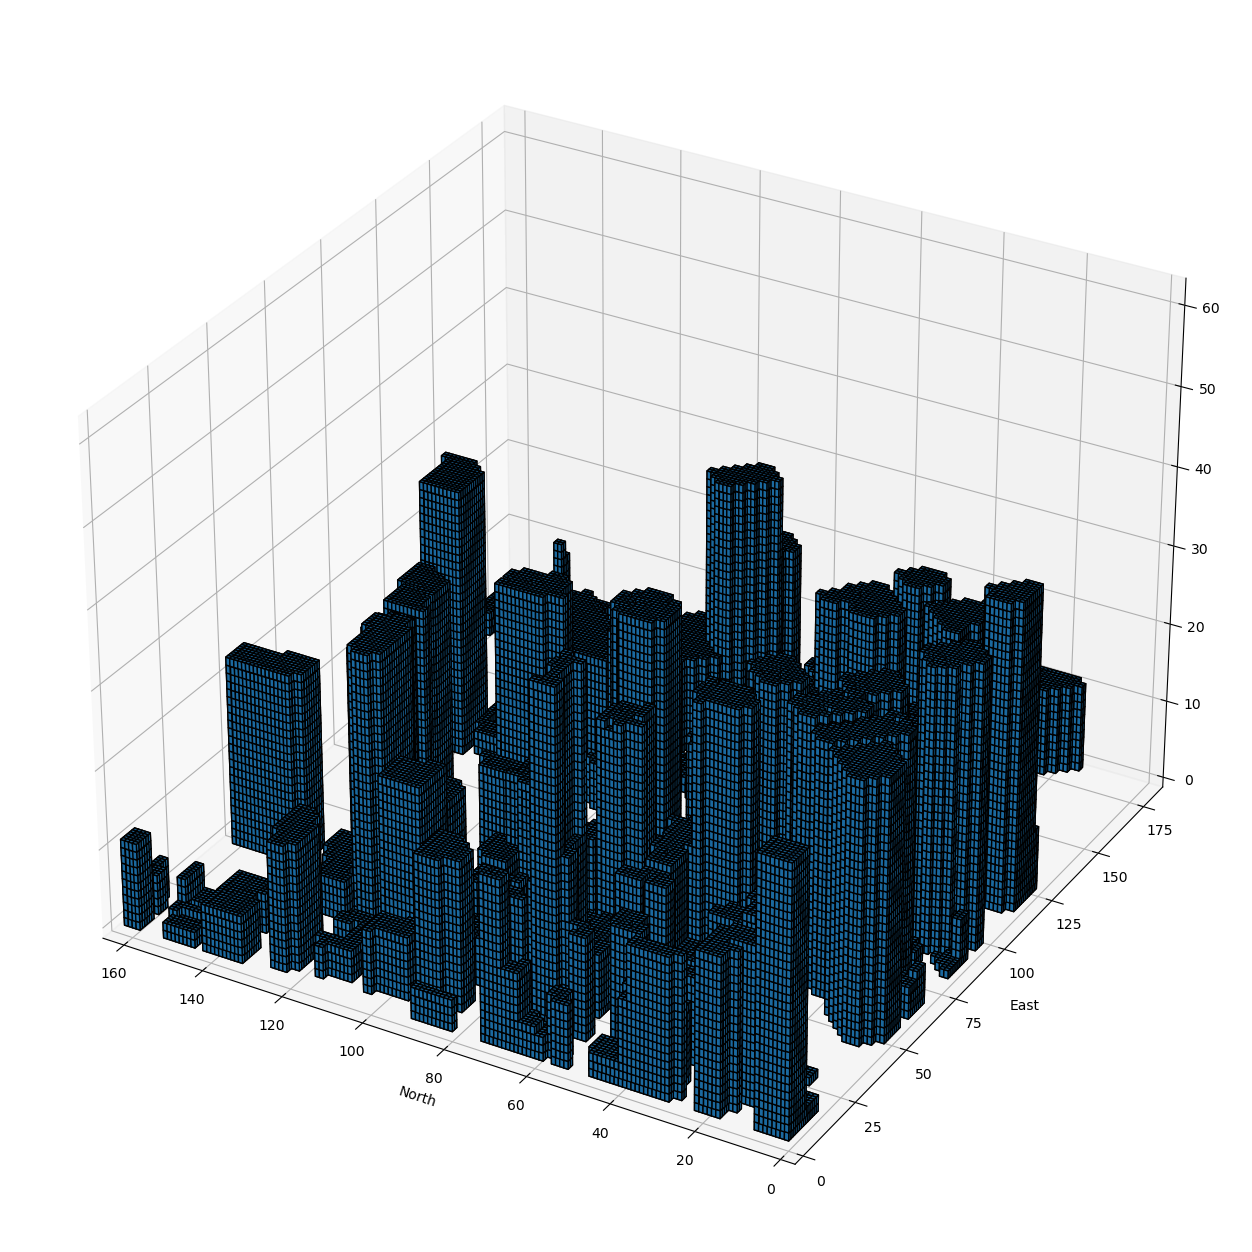

In [12]:
grid = create_3d_grid('colliders.csv')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.voxels(grid, edgecolor='k')
ax.set_xlim(grid.shape[0], 0)
ax.set_ylim(0, grid.shape[1])
# add a bit to z-axis height for visualization
ax.set_zlim(0, grid.shape[2]+20)

plt.xlabel('North')
plt.ylabel('East')

plt.show()